## **Importing Libraries**

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat

## **Reading data**

In [198]:
df = pd.read_csv("./data/titanic.csv", usecols=['Pclass', 'Age', 'Fare', 'Survived'])

In [199]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


## **Handling NaN values**

<Axes: >

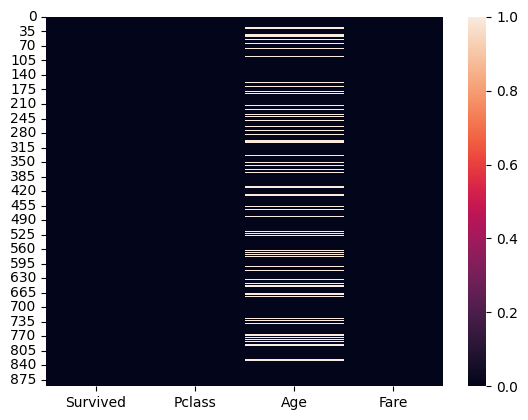

In [200]:
sns.heatmap(df.isnull())

In [201]:
df.fillna({'Age': df['Age'].median()}, inplace=True)

In [202]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

## **Splitting data into training and testing data**

In [203]:
X = df[['Age', 'Fare', 'Pclass']]
y = df['Survived']

In [204]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Feature Transformations**

### **1. Standardization**

`z = (x−μ) / σ`

1. z = scaled data
2. x = actual data
3. μ = mean of data
4. σ = sd of data

In [205]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [206]:
X_train_scaled = scaler.fit_transform(X_train)
# we use fit_transform on trained data as it calculates mean and sd

In [207]:
X_test_scaled = scaler.transform(X_test)
# we use transform on test data as it does not re-calculate mean and sd

In [208]:
X_train_scaled

array([[ 1.25364106, -0.07868358, -1.61413602],
       [-0.47728355, -0.37714494, -0.40055118],
       [ 0.21508629, -0.47486697,  0.81303367],
       ...,
       [ 0.90745614, -0.35580399,  0.81303367],
       [-1.1696534 ,  1.68320121, -1.61413602],
       [-0.63114352,  0.86074761, -1.61413602]], shape=(712, 3))

## **2. Min-Max Scaling / Normaliszation**

`X_scaled = (X - X_min) / (X_max - X_min)`

Scales all values to [0, 1]

In [209]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [210]:
X_train_scaled = scaler.fit_transform(X_train)
# we use fit_transform on trained data as it calculates mean and sd

In [211]:
X_test_scaled = scaler.transform(X_test)
# we use transform on test data as it does not re-calculate mean and sd

In [212]:
X_train_scaled

array([[0.56647399, 0.0556283 , 0.        ],
       [0.28373963, 0.02537431, 0.5       ],
       [0.39683338, 0.01546857, 1.        ],
       ...,
       [0.50992712, 0.02753757, 1.        ],
       [0.17064589, 0.2342244 , 0.        ],
       [0.25860769, 0.15085515, 0.        ]], shape=(712, 3))

## **3. Robust Scaler**

`X_scaled = (X - X_median)/IQR`

Robust scaler is robust to outliers

In [213]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

In [214]:
X_train_scaled = scaler.fit_transform(X_train)
# we use fit_transform on trained data as it calculates mean and sd

In [215]:
X_test_scaled = scaler.transform(X_test)
# we use transform on test data as it does not re-calculate mean and sd

In [216]:
X_train_scaled

array([[ 1.34615385,  0.62218383, -2.        ],
       [-0.38461538, -0.06441639, -1.        ],
       [ 0.30769231, -0.28922259,  0.        ],
       ...,
       [ 1.        , -0.01532226,  0.        ],
       [-1.07692308,  4.67533998, -2.        ],
       [-0.53846154,  2.7833134 , -2.        ]], shape=(712, 3))

## **4. Gaussian Transformation**

This technique is used to bring data close to a gaussian (normal) distribution

In [217]:
def plot_data(df, feature):
    plt.Figure(figsize=(10, 20))
    # Histogram
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.title(f'Histogram of {feature}')

    # Q-Q plot
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist='norm', plot=plt)
    plt.title(f'Q-Q plot of {feature}')

    plt.tight_layout()
    plt.show()

    skew_value = stat.skew(df[feature], bias=False)
    print(f'Skew value = {skew_value}')

# data points should lie mostly in the straight line in the Q-Q plot
# skew value > 0 => right-skewed
# skew value < 0 => left-skewed

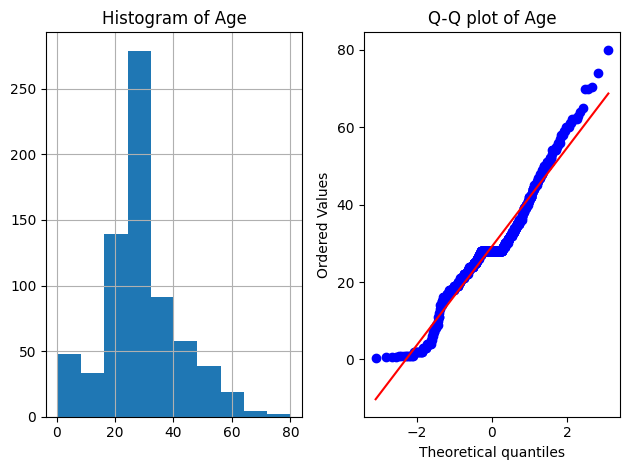

Skew value = 0.4358117197403252


In [218]:
plot_data(X_train, 'Age')

#### **a. Logarithimic Transformation** -> right skewed data

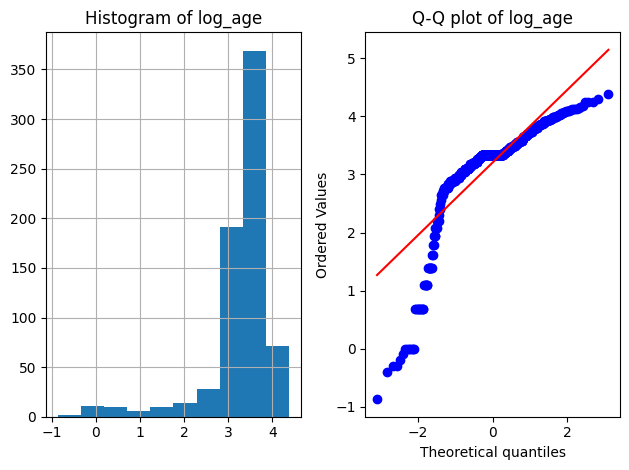

Skew value = -2.65655150639868


In [219]:
X_train['log_age'] = np.log(X_train['Age'])
plot_data(X_train, 'log_age')

#### **b. Sqrt Transformation** -> right skewed data

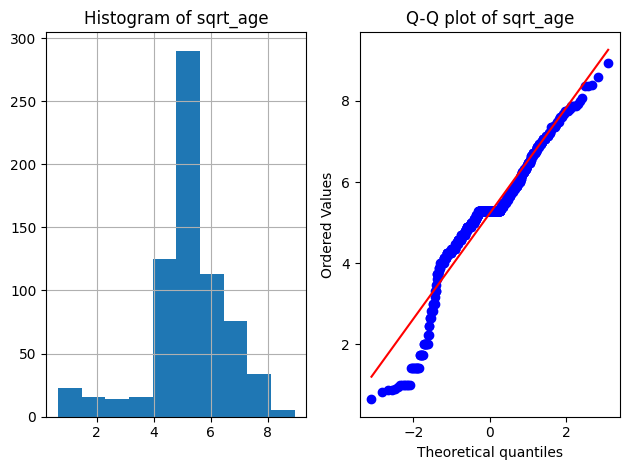

Skew value = -0.851685314482157


In [220]:
X_train['sqrt_age'] = X_train['Age']**(1/2)
plot_data(X_train, 'sqrt_age')

#### **c. Box Cox Transformation** -> right skewed data (+ve values only)

0.822613590495394


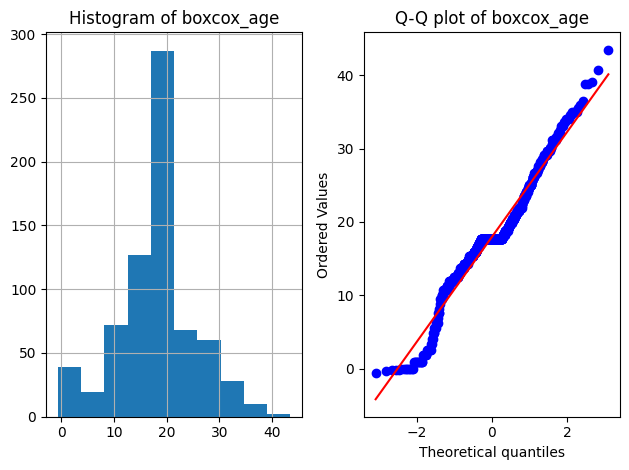

Skew value = 0.0387931346300369


In [221]:
X_train['boxcox_age'], parameter = stat.boxcox(X_train['Age'])
print(parameter)
plot_data(X_train, 'boxcox_age')

#### **d. Reciprocal Transformation** -> right skewed data + compress high values

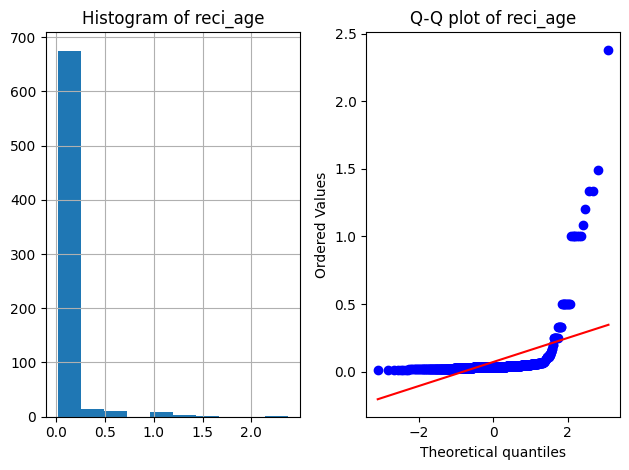

Skew value = 7.116822493010111


In [222]:
X_train['reci_age'] = 1 / X_train['Age']
plot_data(X_train, 'reci_age')

#### **e. Exponential Transformation** -> left skewed data + stretch data

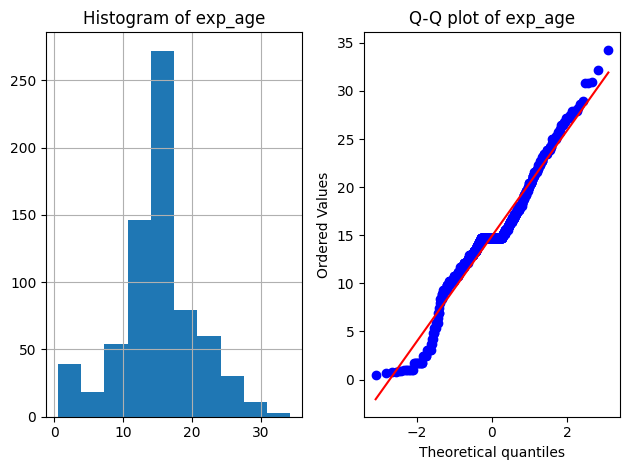

Skew value = 7.606889156125537e-09


In [252]:
X_train['exp_age'] = X_train['Age']**(1/1.23975)
plot_data(X_train, 'exp_age')

#### **f. Yeo-johnson Transformation** -> left skewed data + wide range (similar to boxcox but -ve allowed)

In [254]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

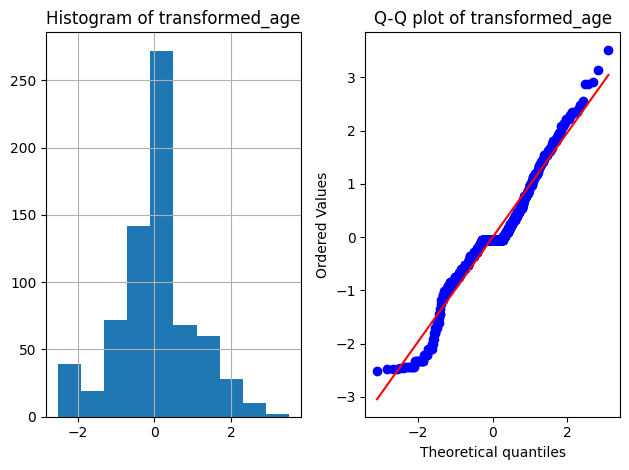

Skew value = 0.05992915463506651


In [256]:
X_train['transformed_age'] = pt.fit_transform(X_train[['Age']])
plot_data(X_train, 'transformed_age')